<a href="https://colab.research.google.com/github/ligemlp/wheat-detection-test1/blob/master/test_saved_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
 
# load a model pre-trained pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
 
# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [3]:
import torch
model.load_state_dict(torch.load("/content/drive/My Drive/fastrcnn_model_02.pt"))

<All keys matched successfully>

In [4]:
from google.colab import files
files.upload()

Saving u=2071715140,355309784&fm=26&gp=0.jpg to u=2071715140,355309784&fm=26&gp=0.jpg


{'u=2071715140,355309784&fm=26&gp=0.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01x\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x01\x02\x03\x04\x06\x00\x07\x08\xff\xc4\x00C\x10\x00\x02\x01\x03\x03\x02\x04\x03\x06\x05\x03\x03\x03\x04\x01\x05\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa"q\x81\x14#2B\x91\xa1\x15R\xb1\xc1\xd13b\xe1$C\xf0Sr\xf1\x07\x164\x82%Dc\xb2\xc2\xe2\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\xff\xc4\x00*\x11\x00\x03\x00\x02\x02\x02\x02\x02\x02\x03\x01\x00\x03\x01\x00\x00\x00\x01\x0

In [0]:
import cv2
import numpy as np
image = cv2.imread("/content/u=2071715140,355309784&fm=26&gp=0.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float32)
image /= 255.0

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

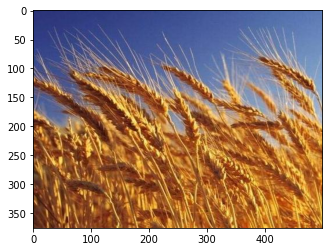

In [9]:
plt.imshow(image)

In [0]:
def draw_images_with_bboxes(image, boxes=None, is_save=False):
    if boxes is None:
        plt.figure(figsize=(16,8))
        if isinstance(image, np.ndarray):
            plt.imshow(image)
        else:
            plt.imshow(image.permute(1,2,0).numpy())
    else:
        if not isinstance(image, np.ndarray):
            image = image.cpu().permute(1,2,0).numpy()
        fig, ax = plt.subplots(1,1,figsize=(16,8))
        for box in boxes:
            cv2.rectangle(image,(box[0],box[1]),(box[2],box[3]),(220,0,0),3)
        ax.set_axis_off()
        plt.imshow(image)
        if is_save:
            plt.savefig("/content/test_images/%s"%(test_image_path[index][-13:]))

In [13]:
model.eval()
image_tensor = torch.tensor(image).permute(2,0,1).unsqueeze(0)
output = model(image_tensor)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [14]:
output

[{'boxes': tensor([[384.6171, 203.8093, 427.8517, 239.9539],
          [  6.5773, 118.7485,  77.2516, 163.5646],
          [188.7248, 357.5952, 224.0927, 375.6649],
          [327.8487, 120.4302, 362.3200, 160.3694],
          [299.5525, 238.7078, 331.5119, 290.3595],
          [428.2752,  98.8182, 486.3170, 139.1853],
          [315.3782, 239.5709, 387.9648, 302.6228],
          [263.9325, 111.5490, 308.5737, 145.8398],
          [234.1734,  97.0768, 307.7107, 149.6685],
          [370.3885, 125.7159, 426.5359, 187.0012],
          [448.3814,  90.2300, 485.0582, 134.2188],
          [248.7356, 119.6780, 283.8476, 151.3301],
          [407.6990,  86.3175, 481.8938, 129.7016]], grad_fn=<StackBackward>),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'scores': tensor([0.9197, 0.3277, 0.3204, 0.2305, 0.2206, 0.0832, 0.0807, 0.0791, 0.0746,
          0.0716, 0.0690, 0.0645, 0.0542], grad_fn=<IndexBackward>)}]

In [0]:
boxes = output[0]["boxes"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


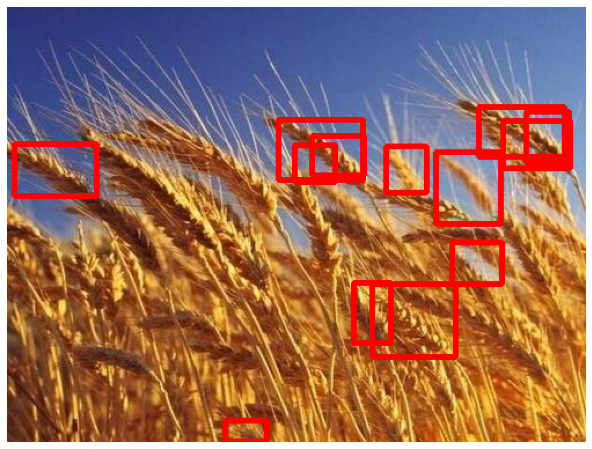

In [16]:
draw_images_with_bboxes(image, boxes)